In [1]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Simple Linear Regression with Synthetic Data

Explore linear regression with a simple database.

## Learning objectives:

After doing this exercise, you'll know how to do the following:

  * Run Colabs.
  * Tune the following [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter):
    * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
    * number of [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
    * [batch size](https://developers.google.com/machine-learning/glossary/#batch_size)
  * Interpret different kinds of [loss curves](https://developers.google.com/machine-learning/glossary/#loss_curve).

## Import relevant modules

The following cell imports the packages that the program requires:

In [2]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass.

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the headline to explore this code.

In [9]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer, only one layer in this model. It can have more.
    model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

    # Compile the model topography into code that
    # TensorFlow can efficiently execute. Configure
    # training to minimize the model's mean squared error.
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
              loss="mean_squared_error",
              metrics=[tf.keras.metrics.RootMeanSquaredError()])


    return model

Certainly. The code snippet you've provided is from TensorFlow, a popular machine learning library. In this snippet, a model is being compiled with certain specifications for its training. Here's a breakdown of each part:

1. **`model.compile(...)`**: This is a method call to compile the model. Compiling the model prepares it for training by configuring the training process. This method needs to be called before you can train the model with data.

2. **`optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate)`**: This argument sets the optimizer for the model to RMSprop, with a specified learning rate. The optimizer is a crucial part because it determines how the model's parameters are updated during training to minimize the loss function. The learning rate (`my_learning_rate`) controls the step size at which the optimizer learns; smaller learning rates may lead to more accurate models but may also require more training epochs to converge.

3. **`loss="mean_squared_error"`**: This argument specifies the loss function that the model will use to evaluate its performance during training. The mean squared error (MSE) is a common choice for regression tasks, where the goal is to minimize the difference between the predicted and actual values.

4. **`metrics=[tf.keras.metrics.RootMeanSquaredError()]`**: This argument specifies a list of metrics to be evaluated by the model during training and testing. In this case, the root mean squared error (RMSE) is used as a metric. RMSE is another common choice for regression tasks as it also measures the difference between the predicted and actual values but gives a higher penalty to large errors compared to MSE.

Together, these arguments configure the model for training with a specified optimizer, loss function, and evaluation metric.

In [10]:
def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

  # Feed the feature values and the label values to the
  # model. The model will train for the specified number
  # of epochs, gradually learning how the feature values
  # relate to the label values.
    history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the
  # rest of history.
    epochs = history.epoch

  # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean
  # squared error at each epoch.
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


Certainly! This script defines a function called `train_model` that is used to train a machine learning model using TensorFlow. Here's an explanation of its components:

1. **Function Definition**:
    ```python
    def train_model(model, feature, label, epochs, batch_size):
    ```
    - `train_model` is the name of the function.
    - `model` is the machine learning model you want to train.
    - `feature` represents the feature data used for training.
    - `label` represents the label data (the true values) used for training.
    - `epochs` is the number of training iterations.
    - `batch_size` is the number of samples per gradient update during training.  

2. **Model Training**:
    ```python
    history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)
    ```
    - The `model.fit` method is used to train the model for a specified number of epochs (`epochs`) using the feature (`feature`) and label (`label`) data with a specified batch size (`batch_size`).

3. **Retrieving Trained Parameters**:
    ```python
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    ```
    - `model.get_weights` method is used to get the weights and biases from the trained model. It is assumed that the model has one layer, so index `[0]` corresponds to the weights and `[1]` to the biases.

4. **Epochs and Training History**:
    ```python
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    ```
    - `history.epoch` retrieves the list of epochs through which the model was trained.
    - `history.history` is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

5. **Calculating Root Mean Squared Error (RMSE)**:
    ```python
    rmse = hist["root_mean_squared_error"]
    ```
    - Extracts the root mean squared error (RMSE) for each epoch from the history DataFrame.

6. **Return Statement**:
    ```python
    return trained_weight, trained_bias, epochs, rmse
    ```
    - The function returns the trained weights and biases, the list of epochs, and the RMSE for each epoch.

7. **Print Statement**:
    ```python
    print("Defined build_model and train_model")
    ```
    - A print statement is used to confirm the definition of the `train_model` function (and presumably a `build_model` function defined elsewhere).

This function is a structured way to train a machine learning model, retrieve important parameters and metrics, and return them for further analysis or use.


## Define plotting functions

We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.

In [11]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""

    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")

  # Plot the feature values vs. label values.
    plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
    plt.show()

This code defines a function `plot_the_model` that plots a trained linear model alongside the data it was trained on. Here is a breakdown of what each part does:

1. **Function Definition**:
```python
def plot_the_model(trained_weight, trained_bias, feature, label):
```
The function `plot_the_model` is defined with four parameters: `trained_weight`, `trained_bias`, `feature`, and `label`. These represent the weight and bias of the trained model, and the feature and label data respectively.

2. **Labeling Axes**:
```python
  plt.xlabel("feature")
  plt.ylabel("label")
```
Here, the x-axis is labeled as "feature" and the y-axis is labeled as "label" using the `xlabel` and `ylabel` methods from the `matplotlib.pyplot` module (assumed to be imported as `plt`).

3. **Plotting Data Points**:
```python
  plt.scatter(feature, label)
```
The `scatter` method is called to create a scatter plot of the data points using the `feature` values for the x-coordinates and the `label` values for the y-coordinates.

4. **Calculating Line Coordinates**:
```python
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
```
Coordinates for two points on the line representing the trained model are calculated. The line starts at `(x0, y0)` and ends at `(x1, y1)`. The x-coordinates `x0` and `x1` are chosen as 0 and the last value in the `feature` array respectively, and the corresponding y-coordinates `y0` and `y1` are calculated using the linear equation `y = mx + b`, where `m` is the `trained_weight` and `b` is the `trained_bias`.

5. **Plotting the Model Line**:
```python
  plt.plot([x0, x1], [y0, y1], c='r')
```
The `plot` method is called to draw a line between the points `(x0, y0)` and `(x1, y1)`. The line is colored red (`c='r'`).

6. **Rendering the Plot**:
```python
  plt.show()
```
The `show` method is called to display the plot. This will render the scatter plot of the data points and the red line representing the trained model in a new window.

Through this function, you can visually assess how well the linear model (represented by the red line) fits the data (represented by the scatter plot).

In [12]:
def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve, which shows loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Define the dataset

The dataset consists of 12 [examples](https://developers.google.com/machine-learning/glossary/#example). Each example consists of one [feature](https://developers.google.com/machine-learning/glossary/#feature) and one [label](https://developers.google.com/machine-learning/glossary/#label).


In [13]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Specify the hyperparameters

The hyperparameters in this Colab are as follows:

  * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

Epoch 1/10
1/1 [==============================] - 1s 693ms/step - loss: 1288.8275 - root_mean_squared_error: 35.9002
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 1270.1635 - root_mean_squared_error: 35.6394
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 1256.7548 - root_mean_squared_error: 35.4507
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 1245.6056 - root_mean_squared_error: 35.2931
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 1235.7655 - root_mean_squared_error: 35.1535
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 1226.7941 - root_mean_squared_error: 35.0256
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 1218.4454 - root_mean_squared_error: 34.9062
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 1210.5675 - root_mean_squared_error: 34.7932
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 1203.0

C:\Users\josem\anaconda3\envs\mlcc\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


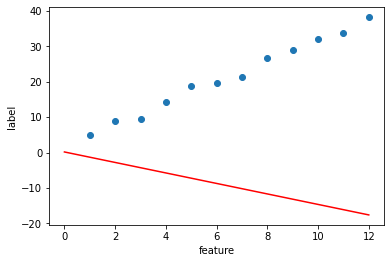

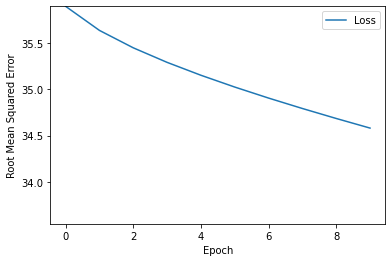

In [14]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

This piece of code seems to be a part of a machine learning script, probably written in Python using a library such as TensorFlow or Keras. Here's a breakdown of the code snippet provided:

1. **Setting Hyperparameters**:
   - `learning_rate = 0.01`: Sets the learning rate for the optimizer. The learning rate determines the step size at which the optimizer updates the model's weights during training. A smaller learning rate may lead to more accurate models but may also require more training epochs.
   - `epochs = 10`: Sets the number of epochs, which are full passes through the dataset, for training the model.
   - `my_batch_size = 12`: Sets the batch size, which is the number of examples the model trains on at once.

2. **Building the Model**:
   - `my_model = build_model(learning_rate)`: Calls a function named `build_model` with the `learning_rate` as an argument. This function presumably constructs and returns a machine learning model configured with the specified learning rate.

3. **Training the Model**:
   - `trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)`: Calls a function named `train_model` to train the model using the provided features (`my_feature`), labels (`my_label`), number of epochs, and batch size. It returns the trained weight and bias values, the number of epochs, and the root mean square error (RMSE) over the training process.

4. **Plotting the Model**:
   - `plot_the_model(trained_weight, trained_bias, my_feature, my_label)`: Calls a function named `plot_the_model` to visualize the trained model by plotting it against the provided features and labels using the trained weight and bias values.

5. **Plotting the Loss Curve**:
   - `plot_the_loss_curve(epochs, rmse)`: Calls a function named `plot_the_loss_curve` to visualize the loss (presumably RMSE in this case) over the epochs. This can help in understanding how well the model is learning from the data over time.

In summary, this code snippet is setting up, training, and visualizing a machine learning model. Without additional context or access to the actual definitions of `build_model`, `train_model`, `plot_the_model`, and `plot_the_loss_curve` functions, it's difficult to provide more specific information about the exact workings of this code. Nonetheless, the general workflow for setting up, training, and evaluating a machine learning model is well-represented in this snippet.

## Task 1: Examine the graphs (Done)

Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots.  Does it?  Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train.  That said, unless you are an extremely lucky person, the red line probably *doesn't* align nicely with the blue dots.  

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

## Task 2: Increase the number of epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should stay steady (zero slope or nearly zero slope), which indicates that training has [converged](http://developers.google.com/machine-learning/glossary/#convergence).

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

In [ ]:
learning_rate=0.01
epochs= ?   # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
#@title Double-click to view a possible solution
learning_rate=0.01
epochs=450
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

## Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

In [ ]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100
epochs=500

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a [roller coaster](https://www.wikipedia.org/wiki/Roller_coaster).  An oscillating loss curve strongly suggests that the learning rate is too high.

## Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible:

*  learning_rate
*  epochs

In [ ]:
# Set the learning rate and number of epochs
learning_rate= ?  # Replace ? with a floating-point number
epochs= ?   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
#@title Double-click to view a possible solution

learning_rate=0.14
epochs=70

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.  

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge.

Experiment with `batch_size` in the following code cell. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

In [ ]:
learning_rate=0.05
epochs=100
my_batch_size= ?  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=100
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.